# Introduction

Inventory management is a critical component of supply chain operations, influencing a company's ability to meet customer demand, maintain cost efficiency, and enhance overall profitability. Traditionally, many businesses have relied on static forecasting methods or manual estimates to decide how much stock to hold at any given time. However, the advent of large-scale data availability—covering everything from historical sales and promotional markdowns to external factors like macroeconomic indicators—has paved the way for more intelligent, data-driven inventory strategies.

In this project, we aim to leverage machine learning and deep learning techniques to forecast product demand more accurately. By doing so, we hope to help businesses maintain optimal inventory levels, prevent costly stockouts, and reduce the financial burden of excess inventory.

This first notebook focuses on data preprocessing, a foundational stage that underpins the success of all subsequent modeling efforts. We will integrate multiple sources of data (e.g., historical sales records, store metadata, economic indicators, and promotional information), clean and transform these raw inputs into a structured, consistent format, and engineer additional features to capture seasonal patterns and store-specific attributes. Finally, we will split the data into training, validation, and test sets, ensuring that future model evaluations reflect genuine performance on unseen data.


# Abstract

As retail landscapes become increasingly competitive, businesses must make informed decisions about how much inventory to hold and when to replenish it. Overestimating demand leads to unnecessary inventory holding costs and potential waste, while underestimating demand results in stockouts and missed sales. This project demonstrates how machine learning and deep learning models, fueled by a rich array of historical and contextual data, can yield reliable demand forecasts that inform more efficient inventory management.

In this initial phase, we undertake comprehensive data preprocessing. We merge disparate datasets, correct irregularities, handle missing values, and engineer meaningful features. By the end of this step, we have a curated dataset that represents a balanced, high-quality foundation from which we can develop predictive models. This robust preparation sets the stage for building sophisticated models that can ultimately guide decision-makers toward optimal inventory strategies.


# Theory

Data preprocessing forms the bedrock of any successful predictive analytics endeavor. Without well-prepared input data, even the most advanced models struggle to extract actionable insights. The theoretical underpinnings of preprocessing revolve around several key areas:

1. **Data Integration:**  
   Often, the raw inputs come from multiple sources—sales records, external economic factors, store attributes, and promotional calendars. Integrating these diverse datasets into a unified view allows models to learn from complex interactions that single-source data might miss.

2. **Data Cleaning:**  
   Real-world data is rarely perfect. Missing values, typographical errors, and outliers are common. The theory of robust preprocessing involves choosing appropriate imputation strategies for missing data (e.g., filling with zeros for no markdown scenario), removing or capping extreme outliers to reduce noise, and ensuring consistent data types.

3. **Feature Engineering:**  
   Extracting additional features enhances the model’s ability to discern patterns. Creating temporal features like `WeekOfYear` and `Year` encodes seasonal trends and holiday periods, while one-hot encoding categorical variables (such as store type) ensures that models can interpret these attributes without bias toward a particular category.

4. **Data Splitting for Model Evaluation:**  
   A core theoretical concept in machine learning is to prevent overfitting by separating the data into distinct sets. The training set informs the model, the validation set guides hyperparameter tuning and early stopping, and the test set provides an unbiased final assessment. This theory ensures that performance metrics reliably indicate how the model will behave in real-world scenarios.

By adhering to these theoretical principles, the preprocessing pipeline ensures that the subsequent modeling phases have a solid foundation. Good preprocessing is not just a technical nicety—it’s a critical factor that influences model accuracy, interpretability, and ultimately, the quality of decisions made based on the model’s predictions.


In this part of the code, I’m setting up the environment for my data analysis and visualization tasks. Here’s what each part does:

- I’m importing `os` to interact with the operating system, like working with file paths.
- `numpy` is included for numerical computations, which are common in data preprocessing.
- `pandas` is my go-to library for handling tabular data efficiently.
- `seaborn` and `matplotlib.pyplot` are here to help me create visualizations. `seaborn` makes the plots look better, while `matplotlib` gives me more control over the visuals.
- Finally, I’m importing `train_test_split` from `sklearn` to split my dataset into training and testing sets later.

In the second part, I’m customizing my visualizations. I set the style to `"whitegrid"` to make the plots more readable and adjust the font scale for better visibility in a notebook context. I also set the default plot size to `(10, 5)` for consistency. 

Lastly, I’m defining `DATA_DIR` to specify where my data files are stored and `TARGET_COL` to indicate that `"Weekly_Sales"` is the column I’ll be focusing on for my analysis.

In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
sns.set(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 5)

DATA_DIR = "data"
TARGET_COL = "Weekly_Sales"

These cells don’t produce any output because they’re meant to set things up for the rest of the analysis. By importing the necessary libraries and customizing the environment, I’m making sure the rest of the code runs smoothly and is easy to follow. This is just the groundwork for loading data, visualizing it, and performing analysis in later steps.


This part of the code ensures that all necessary files for the analysis are present in the specified directory (`DATA_DIR`). Here’s what’s happening:

1. **Directory Check**:
   - The first `if` block checks whether the `DATA_DIR` directory exists.
   - If not, it raises a `FileNotFoundError` with a message guiding where the directory should be located.

2. **File Check**:
   - I define a list `required_files` containing the names of the essential data files: `train.csv`, `features.csv`, and `stores.csv`.
   - For each file in `required_files`, I check whether it exists in `DATA_DIR`. If a file is missing, another `FileNotFoundError` is raised, listing the missing file and prompting the user to add it.

3. **Data Loading**:
   - After verifying the files exist, I use `pandas.read_csv` to load the CSV files into DataFrames:
     - `train.csv` is loaded into `train_df`.
     - `features.csv` is loaded into `features_df`.
     - `stores.csv` is loaded into `stores_df`.
   - The shapes of the DataFrames (i.e., rows and columns) are printed to confirm successful loading.

This ensures the analysis doesn’t proceed without all the required data.


In [25]:
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError("Data directory not found. Ensure it's located at '../data/'.")

required_files = ["train.csv", "features.csv", "stores.csv"]
for f in required_files:
    path = os.path.join(DATA_DIR, f)
    if not os.path.exists(path):
        raise FileNotFoundError(f"{f} not found in {DATA_DIR}. Please add it before proceeding.")


In [27]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
features_df = pd.read_csv(os.path.join(DATA_DIR, "features.csv"))
stores_df = pd.read_csv(os.path.join(DATA_DIR, "stores.csv"))

print("Data Loaded:")
print("train_df:", train_df.shape)
print("features_df:", features_df.shape)
print("stores_df:", stores_df.shape)

Data Loaded:
train_df: (421570, 5)
features_df: (8190, 12)
stores_df: (45, 3)


The output confirms that all the necessary data files were loaded successfully, along with their respective shapes:

- `train_df`: This DataFrame has 421,570 rows and 5 columns. This likely represents the main dataset for analysis.
- `features_df`: This DataFrame contains 8,190 rows and 12 columns, probably holding additional features for the analysis.
- `stores_df`: This DataFrame has 45 rows and 3 columns, which might include store-specific information.

These shapes validate that the data is correctly structured and ready for further exploration and processing.


Here, I’m displaying the first few rows of the three datasets (`train_df`, `features_df`, and `stores_df`) using the `display()` function. This is useful for understanding the structure and content of the datasets before proceeding with any analysis.

1. **`train_df.head()`**:
   - Displays the first five rows of the training dataset. This dataset includes columns such as `Store`, `Dept`, `Date`, `Weekly_Sales`, and `IsHoliday`.

2. **`features_df.head()`**:
   - Displays the first five rows of the features dataset. This dataset contains columns such as `Store`, `Date`, `Temperature`, `Fuel_Price`, multiple `MarkDown` columns, `CPI`, `Unemployment`, and `IsHoliday`.

3. **`stores_df.head()`**:
   - Displays the first five rows of the stores dataset. It contains columns like `Store`, `Type`, and `Size`.

This step gives me a quick overview of what kind of data I’m working with and helps in identifying potential data cleaning or preprocessing steps.


In [29]:
display(train_df.head())
display(features_df.head())
display(stores_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


The output shows the first five rows of each dataset, providing insights into the data:

1. **`train_df`**:
   - Contains transactional data, with columns like `Weekly_Sales` (the target variable) and `IsHoliday` (indicating whether the date is a holiday).

2. **`features_df`**:
   - Includes external features like `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`, which might influence sales. Many `MarkDown` columns have missing values (`NaN`), indicating potential data cleaning needs.

3. **`stores_df`**:
   - Provides store-level metadata, such as the `Type` of store (e.g., A, B) and `Size`.

By examining this output, I can better understand the relationships between these datasets and prepare for merging or feature engineering in the next steps.


In [31]:
# Convert Date to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

In this part of the code, I am merging the three datasets (`train_df`, `features_df`, and `stores_df`) to create a single DataFrame for analysis. Here’s how it works:

1. **First Merge**:
   - I merge `train_df` and `features_df` using `pd.merge`.
   - The merge is based on the columns `Store`, `Date`, and `IsHoliday`, and I use a `left` join to ensure all rows from `train_df` are retained.

2. **Second Merge**:
   - I merge the result with `stores_df` on the `Store` column using another `left` join, ensuring no data from the previous merge is lost.

3. **Displaying Data**:
   - I print the shape of the merged DataFrame (`merged_df`) to verify the number of rows and columns.
   - I use `display()` to show the first five rows of the merged DataFrame.
   - I call `merged_df.info()` to provide an overview of the DataFrame, including column names, data types, and non-null counts. This helps identify missing values or potential issues.


In [33]:
merged_df = pd.merge(train_df, features_df, on=["Store", "Date", "IsHoliday"], how="left")
merged_df = pd.merge(merged_df, stores_df, on="Store", how="left")

In [35]:
print("\nMerged DataFrame shape:", merged_df.shape)
display(merged_df.head())
display(merged_df.info())


Merged DataFrame shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

None

The output confirms the successful creation of the merged DataFrame:

1. **Merged DataFrame Shape**:
   - The DataFrame has 421,570 rows and 16 columns. This indicates that all rows from the training dataset were retained, and additional columns from the features and stores datasets were successfully added.

2. **Sample Rows**:
   - The displayed rows show combined data from all three datasets, including columns like `Weekly_Sales` (from `train_df`), `Temperature` and `Fuel_Price` (from `features_df`), and `Type` and `Size` (from `stores_df`).
   - Many `MarkDown` columns have `NaN` values, suggesting missing data.

3. **DataFrame Info**:
   - The `info()` output provides a detailed overview of the DataFrame:
     - Columns like `Store`, `Dept`, `Weekly_Sales`, and `Type` have no missing values.
     - Some columns (e.g., `MarkDown1` to `MarkDown5`) have significant missing data, indicated by lower non-null counts.
     - Data types are appropriate for analysis, with numerical columns as `float64` or `int64`, categorical data as `object`, and dates as `datetime64`.

This step ensures that the data is consolidated and ready for cleaning, feature engineering, or model training.


In this section of the code, I am handling missing values, extracting date-based features, and preparing the data for modeling:

1. **Missing Values Summary**:
   - I calculate the total number of missing values in each column using `merged_df.isna().sum()` and print a summary of columns with missing values. This helps identify which features need attention.

2. **Filling Missing Values**:
   - I replace all missing values in the DataFrame with `0` using `merged_df.fillna(0)`. This ensures there are no NaNs, which can cause issues during modeling.

3. **Extracting Date Features**:
   - I create two new columns:
     - `WeekOfYear`: Extracted from the `Date` column using `dt.isocalendar().week`.
     - `Year`: Extracted from the `Date` column using `dt.year`. These features might be useful for capturing seasonal trends.

4. **Converting `IsHoliday` to Integer**:
   - If the `IsHoliday` column is of type `bool`, I convert it to `int` (where `False` becomes 0 and `True` becomes 1). This conversion is often necessary for machine learning models.

5. **Encoding Categorical Variables**:
   - I convert the `Type` column into one-hot encoded variables using `pd.get_dummies`, and I drop the first category (`drop_first=True`) to avoid multicollinearity.

6. **Dropping the `Date` Column**:
   - I remove the `Date` column as it is no longer needed after extracting the relevant features. This is done using `merged_df.drop()` with `axis=1` and `inplace=True`.


In [37]:
missing_summary = merged_df.isna().sum()
print("\nMissing values summary:")
print(missing_summary[missing_summary > 0])


Missing values summary:
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64


In [39]:
merged_df = merged_df.fillna(0)


In [41]:
merged_df['WeekOfYear'] = merged_df['Date'].dt.isocalendar().week.astype(int)
merged_df['Year'] = merged_df['Date'].dt.year

In [43]:
if merged_df['IsHoliday'].dtype == bool:
    merged_df['IsHoliday'] = merged_df['IsHoliday'].astype(int)


In [45]:
merged_df = pd.get_dummies(merged_df, columns=['Type'], drop_first=True)


In [47]:
merged_df.drop('Date', axis=1, inplace=True)


The output for this section includes:

1. **Missing Values Summary**:
   - It lists the number of missing values for the `MarkDown` columns. For example, `MarkDown1` has 270,889 missing values, indicating significant gaps in this data.

2. **After Processing**:
   - Missing values are replaced with 0, ensuring the dataset is clean and ready for analysis.
   - New columns `WeekOfYear` and `Year` are added, enriching the dataset with temporal features.
   - The `IsHoliday` column is successfully converted to integers, making it compatible with machine learning algorithms.
   - One-hot encoding of `Type` introduces new columns representing the store types while avoiding redundancy.
   - The `Date` column is dropped, reducing dimensionality as the relevant information has been extracted.

These steps prepare the dataset for modeling by ensuring data completeness, standardization, and feature engineering.


In this cell, I’m visualizing the distribution of the `Weekly_Sales` column to understand its spread and behavior. Here’s what each line does:

1. **Set Plot Size**:
   - I use `plt.figure(figsize=(10, 5))` to set the figure size to ensure the plot is large and clear.

2. **Histogram and KDE Plot**:
   - `sns.histplot` is used to create a histogram of `Weekly_Sales` with a kernel density estimate (KDE) overlay (`kde=True`). This helps visualize both the frequency of sales values and the overall distribution.

3. **Titles and Labels**:
   - I add a title (`"Distribution of Weekly_Sales"`) and axis labels (`"Weekly_Sales"` and `"Count"`) to make the plot informative.

4. **Display the Plot**:
   - `plt.show()` is called to render the plot in the output.


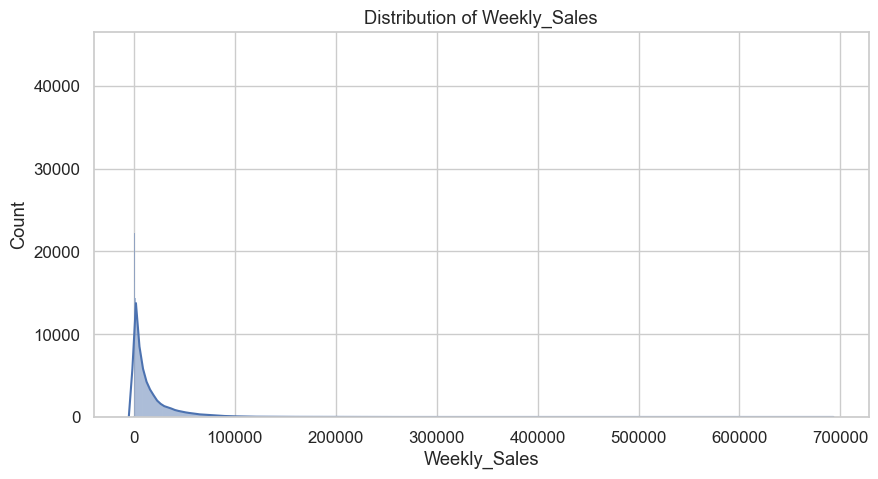

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df[TARGET_COL], kde=True)
plt.title("Distribution of Weekly_Sales")
plt.xlabel("Weekly_Sales")
plt.ylabel("Count")
plt.show()

The plot shows the distribution of the `Weekly_Sales` data:

1. **Skewed Distribution**:
   - The histogram reveals that most `Weekly_Sales` values are clustered near lower values, with a few outliers extending towards higher values.
   - The KDE line confirms a positively skewed distribution, meaning there are some very high sales numbers that occur less frequently.

2. **Insights**:
   - The high concentration of sales near zero suggests that many stores or departments may have low sales during certain periods.
   - The outliers (higher sales) might indicate exceptional sales weeks, possibly influenced by holidays or promotions.

This visualization provides valuable insights into the target variable, highlighting the need for potential transformations or handling of outliers in the data.


In this cell, I calculate and display summary statistics for the `Weekly_Sales` column to gain insights into its distribution. Here’s how the code works:

1. **Print Header**:
   - I print a header `"Weekly_Sales Stats:"` to make the output easily identifiable.

2. **Summary Statistics**:
   - I use `merged_df[TARGET_COL].describe()` to compute key statistics for the `Weekly_Sales` column. This function returns metrics like count, mean, standard deviation, minimum, maximum, and quartiles.

This step helps me better understand the range, central tendency, and variability of `Weekly_Sales`.


In [51]:
print("\nWeekly_Sales Stats:")
print(merged_df[TARGET_COL].describe())


Weekly_Sales Stats:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


The output provides detailed statistics for the `Weekly_Sales` column:

1. **Count**:
   - There are 421,570 observations in the dataset, confirming no missing values in this column.

2. **Mean and Median**:
   - The mean `Weekly_Sales` is approximately 15,981, while the median (50th percentile) is 7,612. The significant gap between the mean and median suggests a skewed distribution, likely due to outliers with very high sales.

3. **Standard Deviation (std)**:
   - A standard deviation of ~22,711 indicates high variability in weekly sales across different stores and departments.

4. **Min and Max**:
   - The minimum value is `-4,988.94`, which might represent a data anomaly or negative adjustments (e.g., returns).
   - The maximum value is `693,099.36`, representing an exceptionally high sales week.

5. **Quartiles (25%, 75%)**:
   - 25% of the observations have weekly sales below ~2,080, and 75% are below ~20,206. This further confirms the skewness.

These statistics highlight the need to handle potential anomalies (like negative sales) and consider transformations to address skewness when building models.


In this cell, I use a boxplot to visualize the distribution and detect outliers in the `Weekly_Sales` column. Here's how the code works:

1. **Set Plot Size**:
   - `plt.figure(figsize=(8, 5))` sets the figure size to ensure the plot is clear and properly scaled.

2. **Boxplot Creation**:
   - I use `sns.boxplot` to create a boxplot for the `Weekly_Sales` column. Boxplots are effective for summarizing distributions and spotting outliers.

3. **Add Title**:
   - I add a title `"Boxplot of Weekly_Sales"` to make the visualization descriptive.

4. **Display the Plot**:
   - `plt.show()` is called to render the plot.

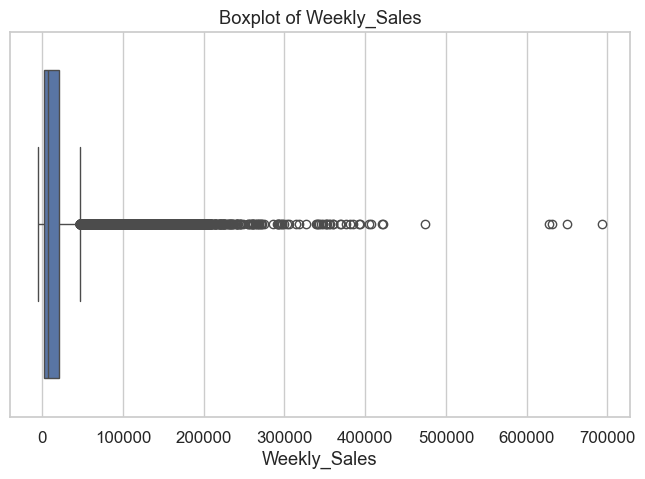

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x=merged_df[TARGET_COL])
plt.title("Boxplot of Weekly_Sales")
plt.show()

The boxplot provides a detailed view of the `Weekly_Sales` distribution:

1. **Box and Whiskers**:
   - The box represents the interquartile range (IQR), showing the middle 50% of the data (from the 25th to the 75th percentile).
   - The line inside the box represents the median, which appears significantly below the mean, confirming a skewed distribution.

2. **Outliers**:
   - Numerous outliers extend far beyond the upper whisker, indicating some weeks had exceptionally high sales.
   - These extreme values might be due to holidays, promotions, or special events.

3. **Insights**:
   - The presence of outliers suggests that further preprocessing might be needed, such as scaling or capping extreme values, depending on the modeling approach.
   - The compactness of the box highlights that most sales are concentrated in a narrow range, while the whiskers and outliers emphasize variability in exceptional weeks.

This visualization effectively highlights the key characteristics and challenges of the `Weekly_Sales` data.

This cell performs outlier capping and visualizes the average weekly sales by year:

1. **Calculate Outlier Cutoff**:
   - I compute the interquartile range (IQR) using the 25th (`q1`) and 75th (`q3`) percentiles of `Weekly_Sales`.
   - The upper bound for outliers is calculated as `q3 + 3 * IQR`, which includes extreme outliers beyond three times the IQR.

2. **Cap Outliers**:
   - I replace any values in `Weekly_Sales` exceeding the upper bound with the upper bound itself. This caps the extreme outliers while retaining the overall structure of the data.

3. **Group Data by Year**:
   - I calculate the average weekly sales for each year by grouping the data by the `Year` column and computing the mean of `Weekly_Sales`.

4. **Bar Plot of Averages**:
   - I use `sns.barplot` to visualize the average weekly sales for each year.
   - I set a figure size and add labels and a title to make the plot descriptive and easy to understand.

In [55]:
q1 = merged_df[TARGET_COL].quantile(0.25)
q3 = merged_df[TARGET_COL].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 3 * iqr
print("Outlier cutoff for Weekly_Sales:", upper_bound)

Outlier cutoff for Weekly_Sales: 74584.45999999999


In [57]:
merged_df.loc[merged_df[TARGET_COL] > upper_bound, TARGET_COL] = upper_bound
print("Capped outliers above:", upper_bound)

Capped outliers above: 74584.45999999999


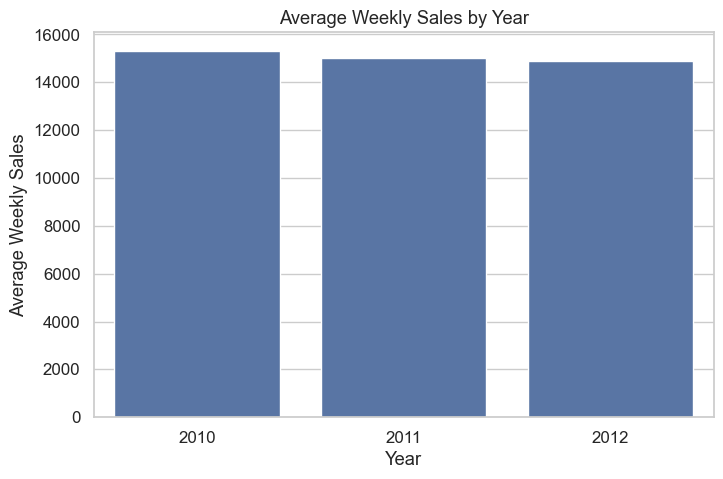

In [59]:
avg_sales_by_year = merged_df.groupby('Year')[TARGET_COL].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Year', y=TARGET_COL, data=avg_sales_by_year)
plt.title("Average Weekly Sales by Year")
plt.ylabel("Average Weekly Sales")
plt.show()

This cell performs outlier capping and visualizes the average weekly sales by year:

1. **Calculate Outlier Cutoff**:
   - I compute the interquartile range (IQR) using the 25th (`q1`) and 75th (`q3`) percentiles of `Weekly_Sales`.
   - The upper bound for outliers is calculated as `q3 + 3 * IQR`, which includes extreme outliers beyond three times the IQR.

2. **Cap Outliers**:
   - I replace any values in `Weekly_Sales` exceeding the upper bound with the upper bound itself. This caps the extreme outliers while retaining the overall structure of the data.

3. **Group Data by Year**:
   - I calculate the average weekly sales for each year by grouping the data by the `Year` column and computing the mean of `Weekly_Sales`.

4. **Bar Plot of Averages**:
   - I use `sns.barplot` to visualize the average weekly sales for each year.
   - I set a figure size and add labels and a title to make the plot descriptive and easy to understand.

This cell visualizes the trend of average weekly sales across different weeks of the year:

1. **Group Data by Week of Year**:
   - I calculate the average `Weekly_Sales` for each week of the year by grouping the data using `WeekOfYear` and applying the `mean()` function.
   - The resulting DataFrame is reset to prepare for plotting.

2. **Line Plot Creation**:
   - I use `sns.lineplot` to plot `WeekOfYear` on the x-axis and the average weekly sales on the y-axis.
   - A line plot is suitable here as it highlights trends over sequential weeks.

3. **Labels and Title**:
   - I add a title (`"Average Weekly Sales by Week of Year"`) and axis labels (`"Average Weekly Sales"` and `"Week of Year"`) for clarity.

4. **Set Figure Size**:
   - The figure size is set to `(10, 5)` to ensure the plot is easy to interpret.

5. **Show Plot**:
   - `plt.show()` renders the plot in the output.


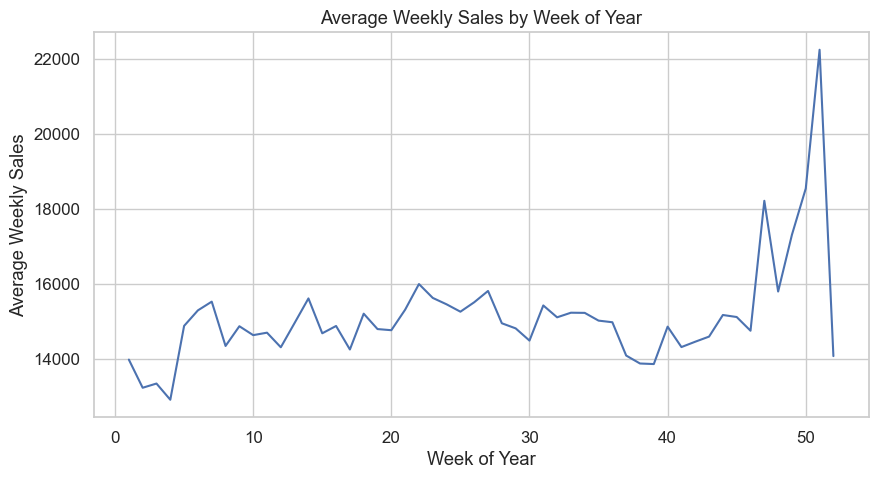

In [61]:
avg_sales_by_week = merged_df.groupby('WeekOfYear')[TARGET_COL].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='WeekOfYear', y=TARGET_COL, data=avg_sales_by_week)
plt.title("Average Weekly Sales by Week of Year")
plt.ylabel("Average Weekly Sales")
plt.xlabel("Week of Year")
plt.show()

The line plot illustrates the average weekly sales trend over the weeks of the year:

1. **Trend Highlights**:
   - Weekly sales remain relatively stable throughout most of the year.
   - A sharp increase in sales is observed towards the end of the year, likely corresponding to holiday shopping (e.g., Black Friday, Christmas).

2. **Insights**:
   - The spike in sales during the last few weeks of the year reflects seasonal trends that could be crucial for planning promotions or inventory.
   - The dip immediately following the peak could indicate post-holiday reductions in sales activity.

This visualization effectively captures seasonal patterns, providing actionable insights into how weekly sales vary over the year.


"Holiday vs Non-Holiday Sales"
- **Data Grouping**: I group the data by `IsHoliday` and calculate the average weekly sales. I map `IsHoliday` to more descriptive labels: `Holiday` and `Non-Holiday`.
- **Bar Plot**: I create a bar plot to compare average weekly sales during holiday and non-holiday periods.


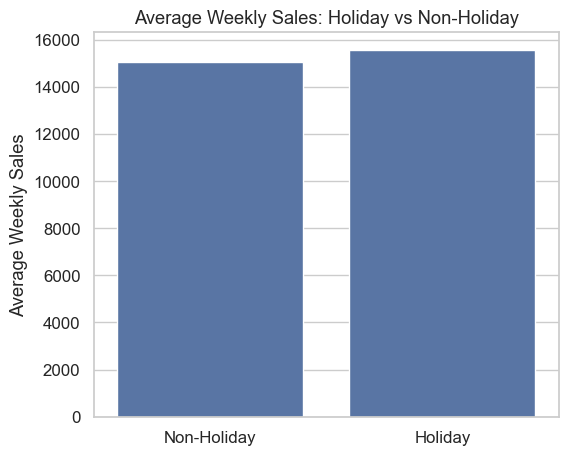

In [63]:
holiday_avg = merged_df.groupby('IsHoliday')[TARGET_COL].mean().reset_index()
holiday_avg['Holiday'] = holiday_avg['IsHoliday'].map({0: 'Non-Holiday', 1: 'Holiday'})

plt.figure(figsize=(6,5))
sns.barplot(x='Holiday', y=TARGET_COL, data=holiday_avg)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("")
plt.ylabel("Average Weekly Sales")
plt.show()


The bar plot reveals that average weekly sales during holidays are higher than non-holiday periods, emphasizing the impact of holiday seasons on sales.

"Store Size Distribution"
- **Histogram**: I use `sns.histplot` to visualize the distribution of store sizes with a KDE overlay to highlight the underlying trends.


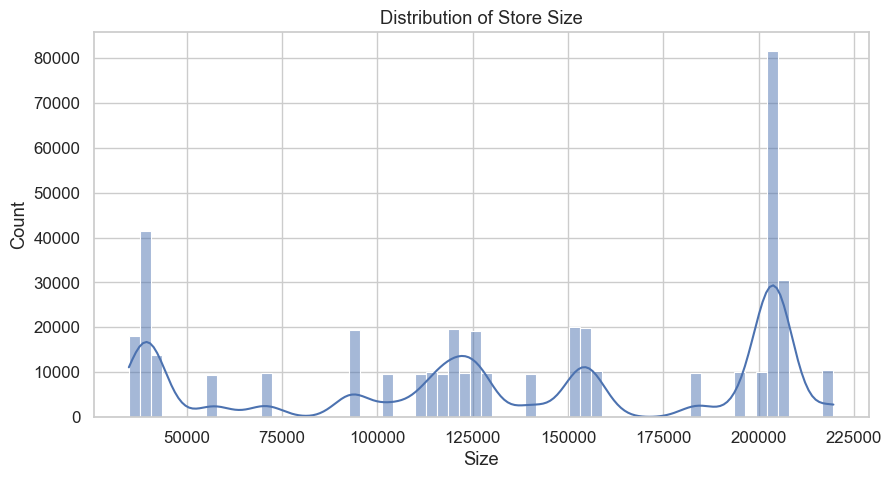

In [65]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df['Size'], kde=True)
plt.title("Distribution of Store Size")
plt.show()

The plot shows a multimodal distribution of store sizes, with a significant number of stores clustered around specific size ranges, indicating distinct store categories.

"Weekly Sales vs Store Size"
- **Scatter Plot**: I use `sns.scatterplot` to visualize the relationship between store size and weekly sales, with transparency (`alpha=0.2`) for overlapping points.

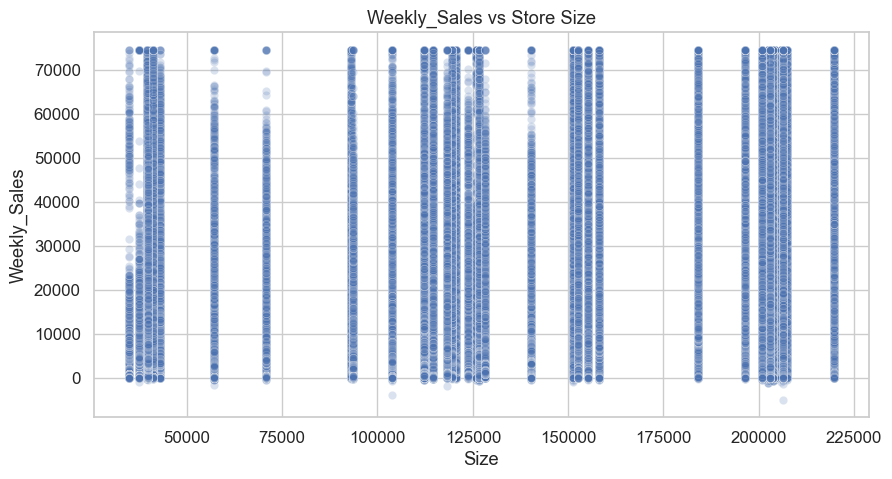

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Size', y=TARGET_COL, data=merged_df, alpha=0.2)
plt.title("Weekly_Sales vs Store Size")
plt.show()

The scatter plot shows no clear linear relationship between store size and weekly sales, suggesting other factors might influence sales more significantly.

"Sales by Store Type"
- **One-Hot Encoding Check**: I calculate average weekly sales for each store type based on one-hot encoded columns.
- **Bar Plot**: I plot the average sales for each store type.

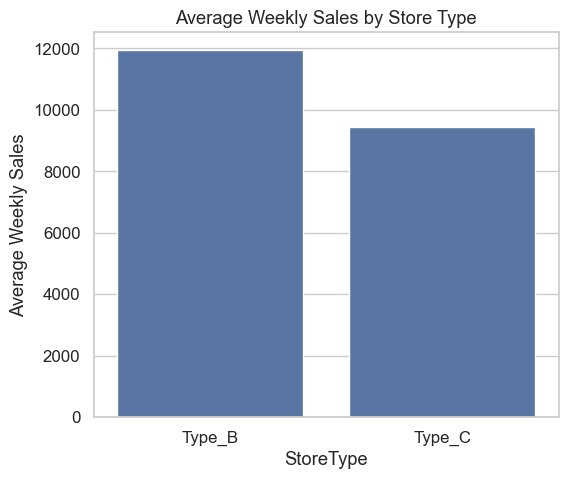

In [69]:
# If we have Type_B and Type_C columns (one-hot encoded)
type_cols = [col for col in merged_df.columns if 'Type_' in col]
if type_cols:
    # Average sales by store type
    avg_sales_by_type = {}
    for t_col in type_cols:
        avg_sales = merged_df[merged_df[t_col] == 1][TARGET_COL].mean()
        avg_sales_by_type[t_col] = avg_sales
    avg_sales_by_type_df = pd.DataFrame(list(avg_sales_by_type.items()), columns=['StoreType', 'AvgWeeklySales'])

    plt.figure(figsize=(6,5))
    sns.barplot(x='StoreType', y='AvgWeeklySales', data=avg_sales_by_type_df)
    plt.title("Average Weekly Sales by Store Type")
    plt.ylabel("Average Weekly Sales")
    plt.show()

The bar plot shows that `Type_B` stores have the highest average weekly sales, followed by `Type_C`, highlighting differences in performance based on store types.


"Top 10 Departments by Average Weekly Sales"
- **Grouping and Sorting**: I group by `Dept` and calculate average sales, then sort and select the top 10 departments.
- **Bar Plot**: I visualize the top 10 departments.

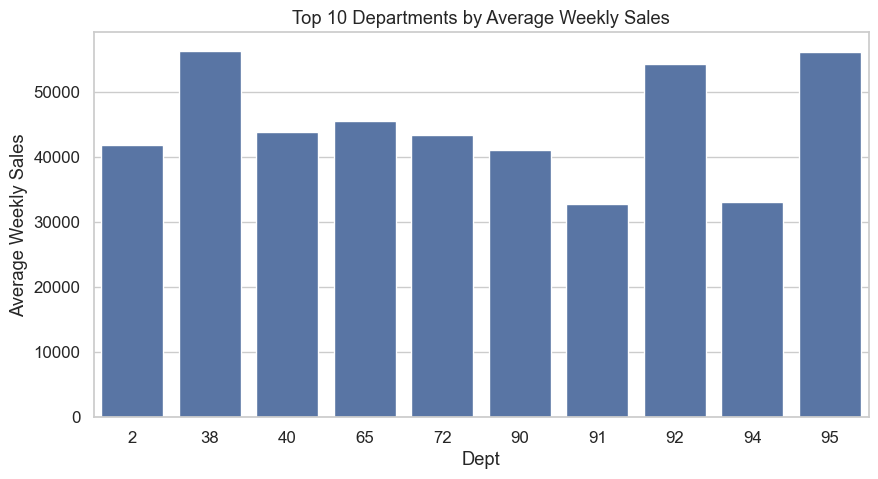

In [71]:
# Which departments have the highest sales on average?
avg_sales_by_dept = merged_df.groupby('Dept')[TARGET_COL].mean().reset_index()
top10_depts = avg_sales_by_dept.sort_values(TARGET_COL, ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Dept', y=TARGET_COL, data=top10_depts)
plt.title("Top 10 Departments by Average Weekly Sales")
plt.ylabel("Average Weekly Sales")
plt.show()

The bar plot shows departments with the highest average weekly sales, providing insights into the most profitable product categories.

"Correlation Heatmap"
- **Correlation Matrix**: I compute the correlation matrix for numerical features.
- **Heatmap**: I use `sns.heatmap` to visualize correlations, applying a colormap (`coolwarm`).

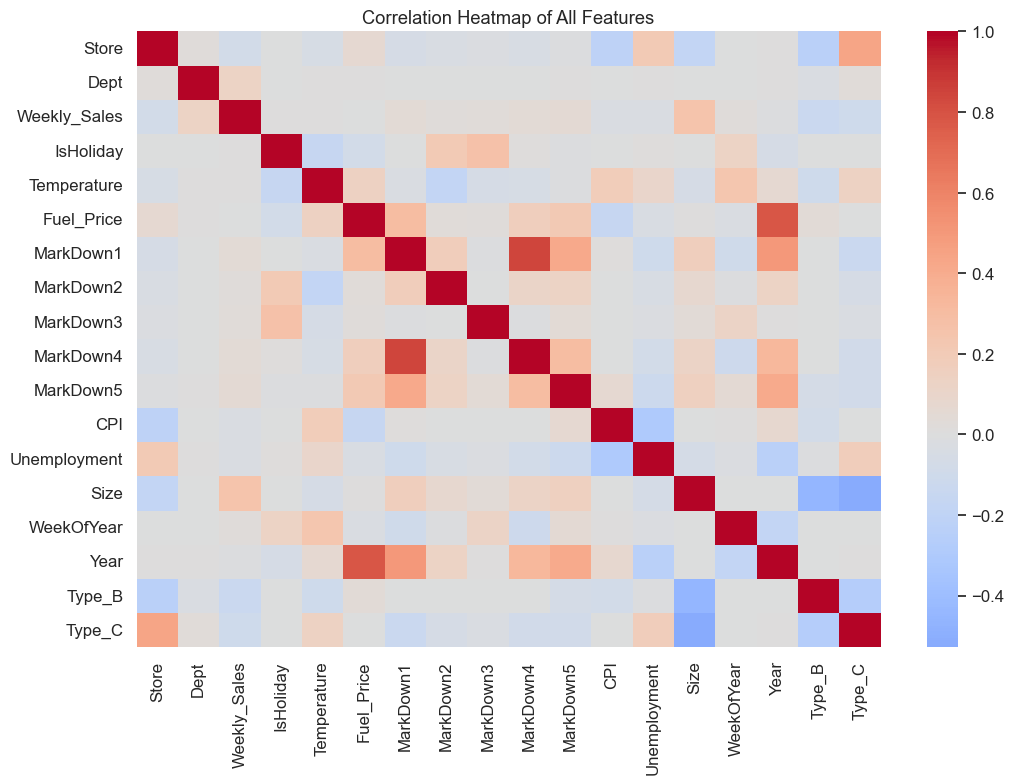

In [73]:
plt.figure(figsize=(12,8))
correlations = merged_df.corr()
sns.heatmap(correlations, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of All Features")
plt.show()

The heatmap reveals relationships between features:
- `Size` has a moderate correlation with `Weekly_Sales`.
- Some `MarkDown` columns also show correlations, suggesting their importance in sales trends.

This cell calculates and displays the correlation of each feature with the target variable (`Weekly_Sales`) and prepares the dataset for modeling:

1. **Correlation with Target**:
   - I extract the correlations of all features with `Weekly_Sales` from the correlation matrix.
   - The correlations are sorted in descending order for easy interpretation of feature importance.

2. **Feature and Target Separation**:
   - I split the data into features (`X`) and target (`y`).
   - `X` includes all columns except `Weekly_Sales`, and `y` contains only `Weekly_Sales`.

3. **Print Shapes**:
   - I print the shapes of `X` and `y` to verify the separation process and ensure that the data is ready for modeling.


In [75]:
corr_with_target = correlations[TARGET_COL].sort_values(ascending=False)
print("\nCorrelation of features with Weekly_Sales:")
print(corr_with_target)



Correlation of features with Weekly_Sales:
Weekly_Sales    1.000000
Size            0.256895
Dept            0.129492
MarkDown5       0.052736
MarkDown1       0.049870
MarkDown4       0.039081
MarkDown3       0.027798
WeekOfYear      0.024955
MarkDown2       0.022204
IsHoliday       0.006872
Temperature     0.002802
Fuel_Price      0.001962
Year           -0.009572
Unemployment   -0.024309
CPI            -0.025354
Store          -0.081936
Type_C         -0.101359
Type_B         -0.134143
Name: Weekly_Sales, dtype: float64


In [77]:
X = merged_df.drop(TARGET_COL, axis=1)
y = merged_df[TARGET_COL]

In [79]:

print("\nFeature Data Shape:", X.shape)
print("Target Data Shape:", y.shape)


Feature Data Shape: (421570, 17)
Target Data Shape: (421570,)


1. **Correlations**:
   - The correlation table shows the strength of the relationship between each feature and `Weekly_Sales`:
     - `Size` has the highest positive correlation (0.256), indicating larger stores tend to have higher sales.
     - `Dept` also shows a moderate positive correlation (0.129).
     - Features like `MarkDown5`, `MarkDown1`, and `MarkDown4` show small positive correlations, highlighting their potential relevance.
     - Negative correlations for `Type_B` (-0.134) and `Type_C` (-0.101) suggest these store types might underperform compared to others.

2. **Feature and Target Shapes**:
   - `X` has a shape of `(421,570, 17)`, indicating there are 17 features for 421,570 records.
   - `y` has a shape of `(421,570,)`, confirming that the target variable aligns with the feature data.

This step ensures that the data is correctly prepared for machine learning models by identifying key features and splitting the dataset appropriately.


This cell performs dataset splitting and saves the resulting datasets to files:

1. **Splitting the Data**:
   - `train_test_split` is used twice:
     - First, the data is split into a training set (`X_train_full`, `y_train_full`) and a test set (`X_test`, `y_test`) with a test size of 20%.
     - Second, the training data is further split into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`), also with a test size of 20%.

2. **Print Data Splits**:
   - The shapes of the training, validation, and test sets are printed to verify the splits.

3. **Saving the Data**:
   - Each dataset (`X_train`, `y_train`, `X_val`, `y_val`, `X_test`, `y_test`) is saved as a CSV file in the `DATA_DIR` directory using `to_csv`.

4. **Completion Message**:
   - A message is printed to confirm that preprocessing and exploratory data analysis (EDA) are complete and files have been saved successfully.


In [81]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

print("\nData splits:")
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)



Data splits:
Train set: (269804, 17) (269804,)
Validation set: (67452, 17) (67452,)
Test set: (84314, 17) (84314,)


In [83]:
X_train.to_csv(os.path.join(DATA_DIR, 'X_train.csv'), index=False)
y_train.to_csv(os.path.join(DATA_DIR, 'y_train.csv'), index=False)
X_val.to_csv(os.path.join(DATA_DIR, 'X_val.csv'), index=False)
y_val.to_csv(os.path.join(DATA_DIR, 'y_val.csv'), index=False)
X_test.to_csv(os.path.join(DATA_DIR, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(DATA_DIR, 'y_test.csv'), index=False)

print("\nPreprocessing and EDA completed. Files saved successfully.")



Preprocessing and EDA completed. Files saved successfully.


1. **Data Splits**:
   - The printed shapes confirm the data is split as intended:
     - Training set: 269,804 rows and 17 features.
     - Validation set: 67,452 rows and 17 features.
     - Test set: 84,314 rows and 17 features.
   - These splits ensure there is sufficient data for model training, tuning, and testing.

2. **Completion Message**:
   - The message `"Preprocessing and EDA completed. Files saved successfully."` confirms that all datasets were saved to files without errors, making them ready for subsequent modeling steps.

This step sets up the data pipeline by ensuring proper splits and storage for streamlined modeling.


### MIT License

Copyright (c) 2024 yagnik-10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.